#Importing Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [22]:
#Visualization

In [23]:
%matplotlib inline
sns.set_style('whitegrid')

Step 2: Data Acquisition

In [24]:
# Load Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

# Display the first five rows
titanic.head()

# Load Titanic dataset from CSV
titanic = pd.read_csv('tested.csv')

# Display the first five rows
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Step 3: Exploratory Data Analysis (EDA)

In [25]:
# Display the shape of the dataset
print(f"Dataset contains {titanic.shape[0]} rows and {titanic.shape[1]} columns.")

# Summary of the dataset
titanic.info()

# Statistical summary of numerical features
titanic.describe()


Dataset contains 418 rows and 12 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Checking for Missing Values

In [26]:
# Check for missing values
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Visualizing Survival Rates
Overall Survival Count

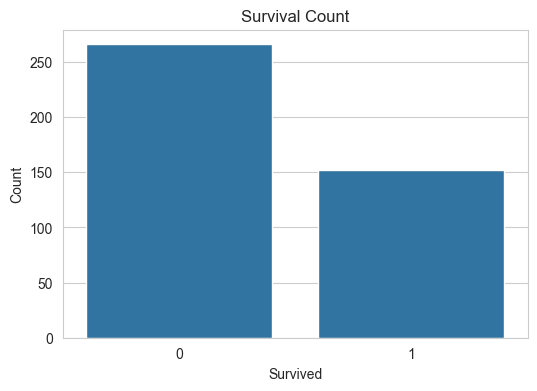

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


Survival by Sex

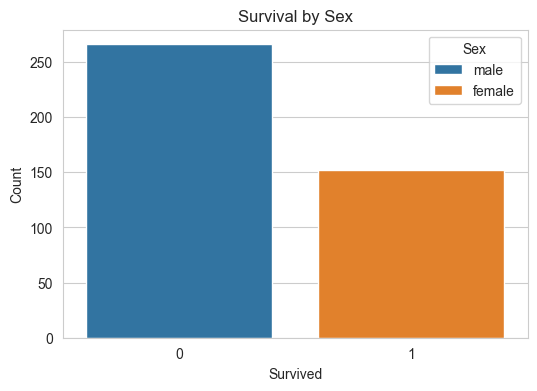

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Survival by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()


Survival by Passenger Class

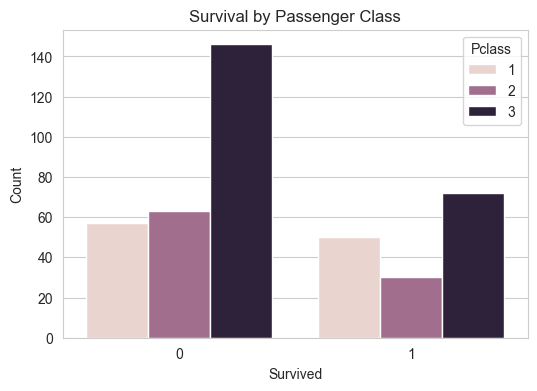

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Pclass', data=titanic)
plt.title('Survival by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.show()


Age Distribution

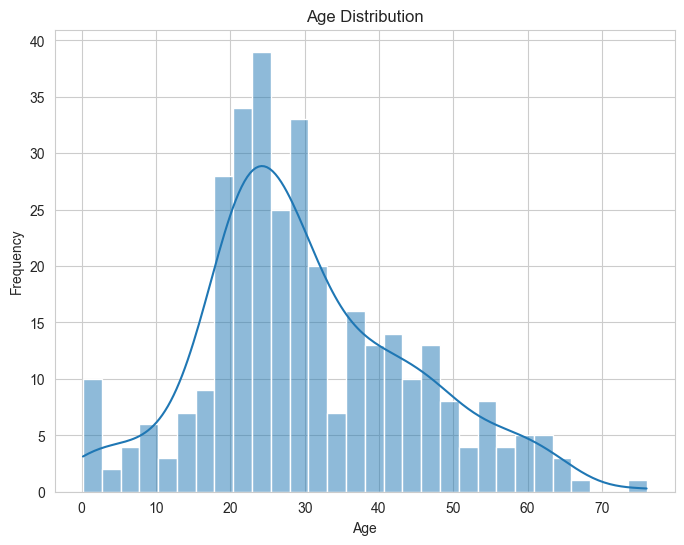

In [39]:
plt.figure(figsize=(8,6))
sns.histplot(titanic['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Fare Distribution

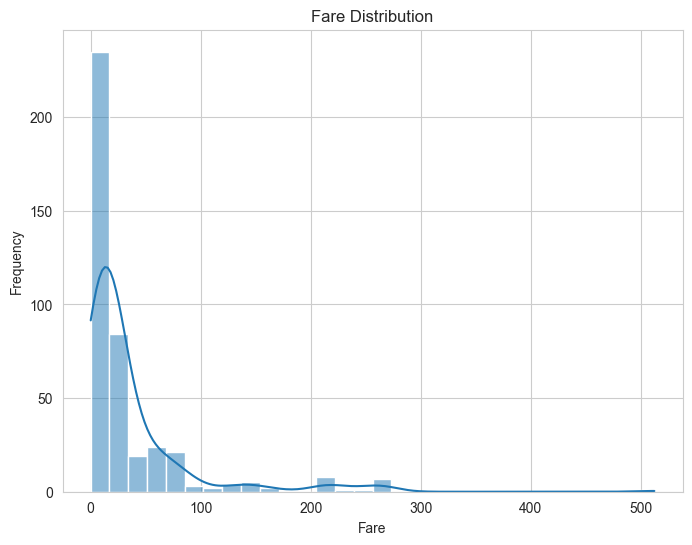

In [40]:
plt.figure(figsize=(8,6))
sns.histplot(titanic['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


Correlation Heatmap

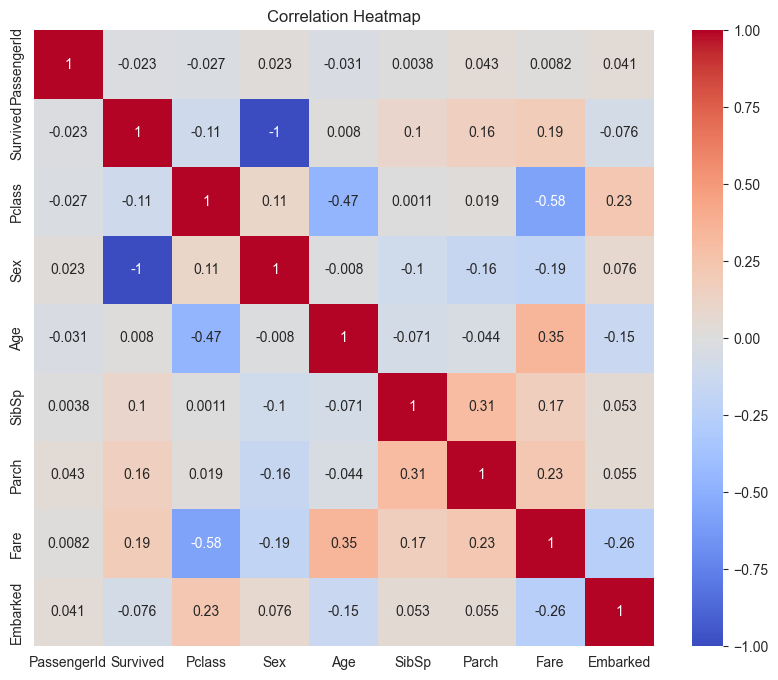

In [48]:

# Load the Titanic dataset
titanic = pd.read_csv('tested.csv')

# Data Preprocessing Steps
# Fill missing values
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Embarked'] = le.fit_transform(titanic['Embarked'])

# Drop non-numeric columns
titanic_numeric = titanic.drop(columns=['Name', 'Ticket', 'Cabin'])

# Compute the correlation matrix
corr_matrix = titanic_numeric.corr()

# Set the plot size
plt.figure(figsize=(10,8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Add title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


Step 4: Data Cleaning and Preprocessing

#Handling Missing Values

In [54]:
# Verify no missing values remain
titanic.isnull().sum()



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

Dropping Unnecessary Columns

In [56]:
# Identify columns to drop
columns_to_drop = ['Ticket', 'Name', 'Passenger_Id'] if 'Passenger_Id' in titanic.columns else ['Ticket', 'Name']

# Drop columns
titanic.drop(columns=columns_to_drop, axis=1, inplace=True)


Feature Scaling

In [58]:
# Identify numerical columns
numerical_cols = ['Age', 'Fare']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
titanic[numerical_cols] = scaler.fit_transform(titanic[numerical_cols])

# Verify the scaling
titanic.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,0.386231,0,0,-0.497811,1
1,893,1,3,0,1.371370,1,0,-0.512660,2
2,894,0,2,1,2.553537,0,0,-0.464532,1
3,895,0,3,1,-0.204852,0,0,-0.482888,2
4,896,1,3,0,-0.598908,1,1,-0.417971,2


Step 5: Feature Engineering

In [71]:
# Load the Titanic dataset
titanic = pd.read_csv('tested.csv')

# Initialize LabelEncoder
le = LabelEncoder()

# Extract titles from names using a raw string
titanic['Title'] = titanic['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Replace titles with fewer occurrences
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 
               'Sir', 'Jonkheer', 'Dona']
titanic['Title'] = titanic['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')
titanic['Title'] = titanic['Title'].replace(rare_titles, 'Rare')

# Encode 'Title'
titanic['Title'] = le.fit_transform(titanic['Title'])

# Drop 'Name' column as it's no longer needed
titanic.drop('Name', axis=1, inplace=True)

# Display the first few rows to verify the changes
print(titanic.head())


   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch   Ticket  \
0          892         0       3    male  34.5      0      0   330911   
1          893         1       3  female  47.0      1      0   363272   
2          894         0       2    male  62.0      0      0   240276   
3          895         0       3    male  27.0      0      0   315154   
4          896         1       3  female  22.0      1      1  3101298   

      Fare Cabin Embarked  Title  
0   7.8292   NaN        Q      2  
1   7.0000   NaN        S      3  
2   9.6875   NaN        Q      2  
3   8.6625   NaN        S      2  
4  12.2875   NaN        S      3  


Step 6: Model Building

In [72]:
# Define target variable
y = titanic['Survived']

# Define feature set by dropping 'survived'
X = titanic.drop('Survived', axis=1)

# Verify the feature set
print(X.head())


   PassengerId  Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3    male  34.5      0      0   330911   7.8292   NaN   
1          893       3  female  47.0      1      0   363272   7.0000   NaN   
2          894       2    male  62.0      0      0   240276   9.6875   NaN   
3          895       3    male  27.0      0      0   315154   8.6625   NaN   
4          896       3  female  22.0      1      1  3101298  12.2875   NaN   

  Embarked  Title  
0        Q      2  
1        S      3  
2        Q      2  
3        S      2  
4        S      3  


Splitting the Dataset

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")


Training set: (334, 11)
Testing set: (84, 11)


Logistic Regression: A simple and interpretable linear model.

In [104]:
# Load the dataset
data_titanic = pd.read_csv("tested.csv")

# Display the first few rows and column names to understand the dataset
print(data_titanic.head())
print(data_titanic.columns)  # Check available column names

# Step 1: Separate features and target variable
# Replace 'Target' with the actual name of your target column
# Make sure to check the case and any extra spaces in the column names
target_column_name = 'Target'  # Update this based on your dataset

# Check if the target column exists in the DataFrame
if target_column_name not in data_titanic.columns:
    print(f"Error: The column '{target_column_name}' does not exist in the dataset.")
else:
    X = data_titanic.drop(target_column_name, axis=1)  # Features
    y = data_titanic[target_column_name]                # Target

    # Step 2: Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 3: Convert categorical variables to numeric using One-Hot Encoding
    X_train_encoded = pd.get_dummies(X_train, drop_first=True)
    X_test_encoded = pd.get_dummies(X_test, drop_first=True)

    # Align columns in X_test_encoded to match X_train_encoded
    X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

    # Step 4: Initialize and fit the Logistic Regression model
    logreg = LogisticRegression(max_iter=1000)

    # Train the model
    logreg.fit(X_train_encoded, y_train)

    # Step 5: Make predictions
    y_pred_logreg = logreg.predict(X_test_encoded)

    # Print predictions
    print("Predictions:", y_pred_logreg)


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Par

Random Forest Classifier: An ensemble method that can capture complex patterns.

In [108]:
# Load the dataset
data_titanic = pd.read_csv("tested.csv")

# Display the first few rows and column names to understand the dataset
print(data_titanic.head())
print(data_titanic.columns)

# Step 1: Define the target column name
target_column_name = 'Survived'  # Target column

# Step 2: Separate features and target variable
X = data_titanic.drop(target_column_name, axis=1)  # Features
y = data_titanic[target_column_name]                # Target

# Step 3: Handle missing values
# For numerical columns, fill missing values with the median
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].median())

# For categorical columns, fill missing values with the mode
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col].fillna(X[col].mode()[0], inplace=True)

# Step 4: Convert categorical variables to numeric using One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 6: Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 7: Train the model
rf.fit(X_train, y_train)

# Step 8: Make predictions
y_pred_rf = rf.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest Classifier:", accuracy)


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Par

Step 7: Model Evaluation

Logistic Regression Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



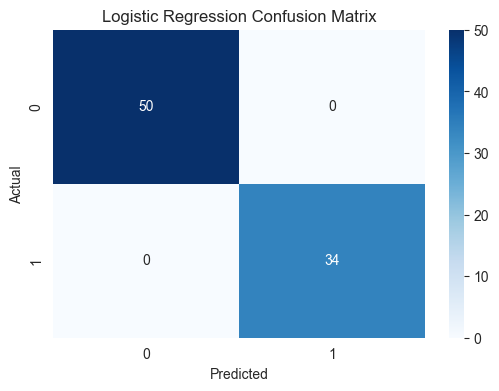

In [113]:
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Evaluating Random Forest Classifier

Random Forest Classifier Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



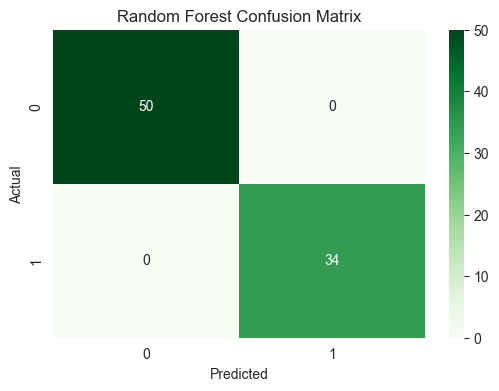

In [114]:
print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Step 8: Hyperparameter Tuning

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Classifier Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



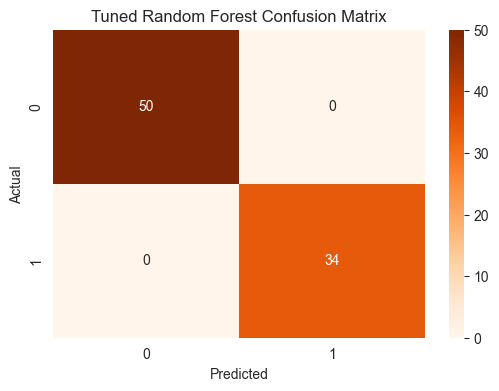

In [115]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Best estimator
best_rf = grid_search.best_estimator_

# Make predictions with the best estimator
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the best estimator
print("Tuned Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), annot=True, fmt='d', cmap='Oranges')
plt.title('Tuned Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Step 9: Conclusion and Next Steps
Summary of What You've Accomplished
Data Exploration: Gained insights into the dataset's structure and key features.
Data Cleaning: Handled missing values and encoded categorical variables.
Feature Engineering: Created new features to enhance model performance.
Model Building: Trained Logistic Regression and Random Forest models.
Model Evaluation: Assessed model performance using accuracy, classification reports, and confusion matrices.
Model Optimization: Improved the Random Forest model through hyperparameter tuning.
Feature Importance Analysis: Identified which features contributed most to the model's predictions.

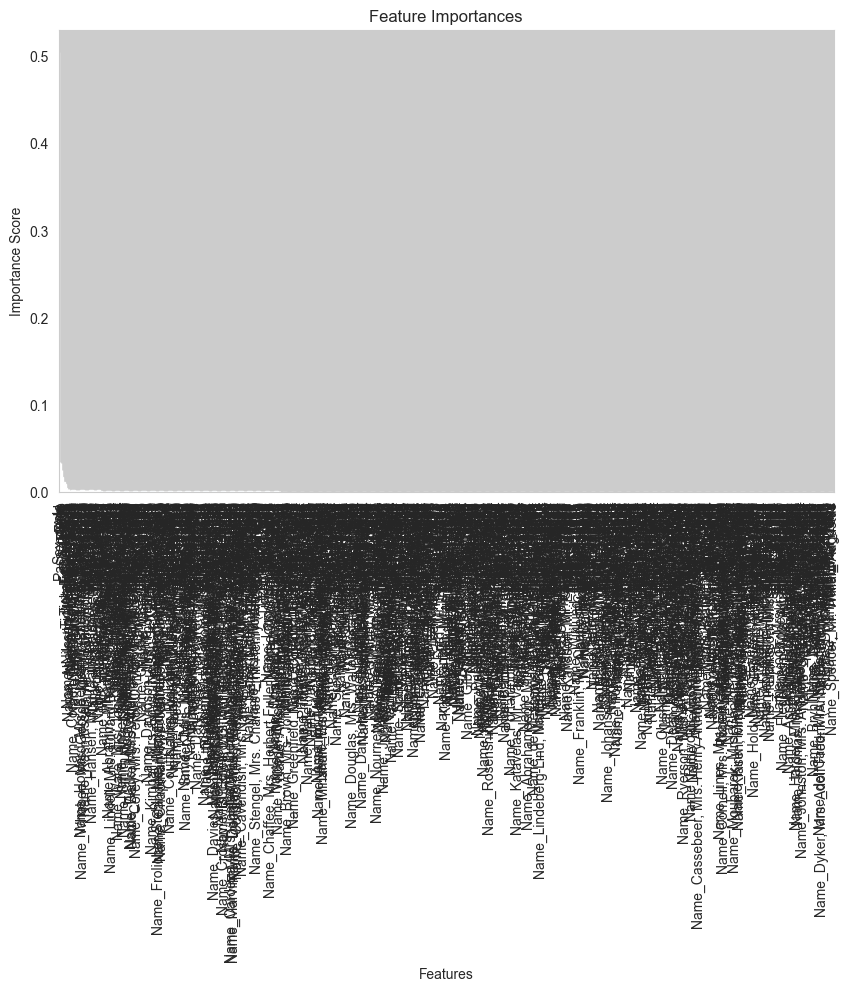

In [122]:

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()
